## What is NUCAPS?
The NOAA Unique Combined Atmospheric Processing System (NUCAPS) operationally produces atmospheric sounding products from the Suomi National-Polar-orbiting Partnership (S-NPP) and NOAA-20 polar orbiting satellites. From each satellite, NUCAPS is near-global with twice-daily scans and available in near real-time. NUCAPS provides vertical profiles of temperature, humidity, and trace gases such as ozone, methane, and carbon monoxide.

NUCAPS humidity profiles is useful for studying the impact of the Saharan Air Layer (SAL) on Atlantic air quality and cyclogenesis. They can be also used to verify model predictions for SAL propagation.


## Where can I get NUCAPS datasets?
Data can be ordered from [NOAA CLASS](https://www.bou.class.noaa.gov/saa/products/search?sub_id=0&datatype_family=JPSS_SND&submit.x=24&submit.y=7), under the JPSS Sound Products (JPSS_SND) drop down menu.

## How can I visualize NUCAPS datasets?
The daily ascending and descending overpasses can be viewed online via the [NOAA/STAR](https://www.star.nesdis.noaa.gov/jpss/EDRs/products_Soundings_N20.php).

Below is a short tutorial on how to display NUCAPS using Python and Jupyter Notebooks. This is intended to be a simple exercise and even if you are not a Python programmer, you may be able to port it to another language of choice.

### Objectives
* Open and inspect a single NUCAPS file, containing one swath of data
* Create a both maps and vertical cross sections
* Combine many single file onto a map

In [97]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import matplotlib.pyplot as plt
import xarray as xr

In [135]:
# Read in a single NUCAPS netcdf file; set decode time = false (the time doesnt follow standard formatting)
fname = 'sal/NUCAPS-EDR_v2r0_npp_s201809201634390_e201809201635090_c201809201739220.nc'
nucaps = xr.open_dataset(fname, decode_times=False)

In [146]:
# Uncomment to inspect the file contents...
# nucaps

Discussion

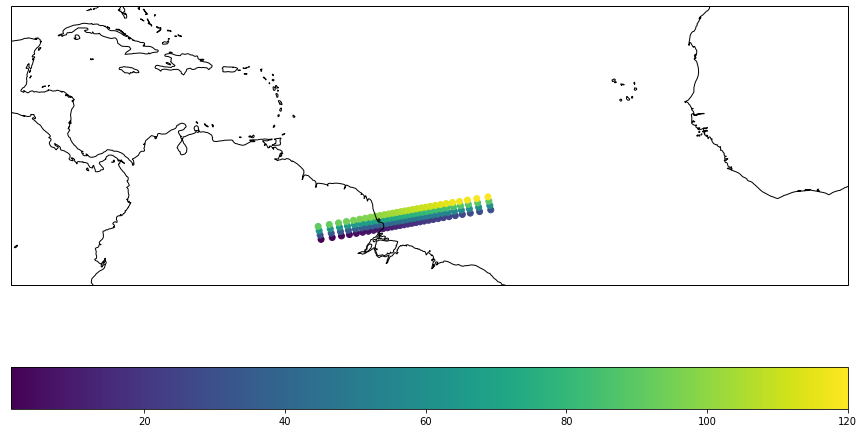

In [152]:
# Initiate the plot
fig = plt.figure(figsize=(15, 10))

# Adds a map to the plot
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

# Plots the latitude and longitude of the NUCAPS data
plt.scatter(nucaps['Longitude'], nucaps['Latitude'], c=nucaps['CrIS_FORs'])

plt.colorbar(orientation='horizontal')

# Expands axes
ax.set_ylim(-5, 25)
ax.set_xlim(-90, 0)

# Display plot
plt.show()

Discussion

In [61]:
print(nucaps['Pressure'].shape, nucaps['H2O'].shape, nucaps['CrIS_FORs'].shape)
repeatFORs = np.repeat(nucaps['CrIS_FORs'].values, 100)

(120, 100) (120, 100) (120,)


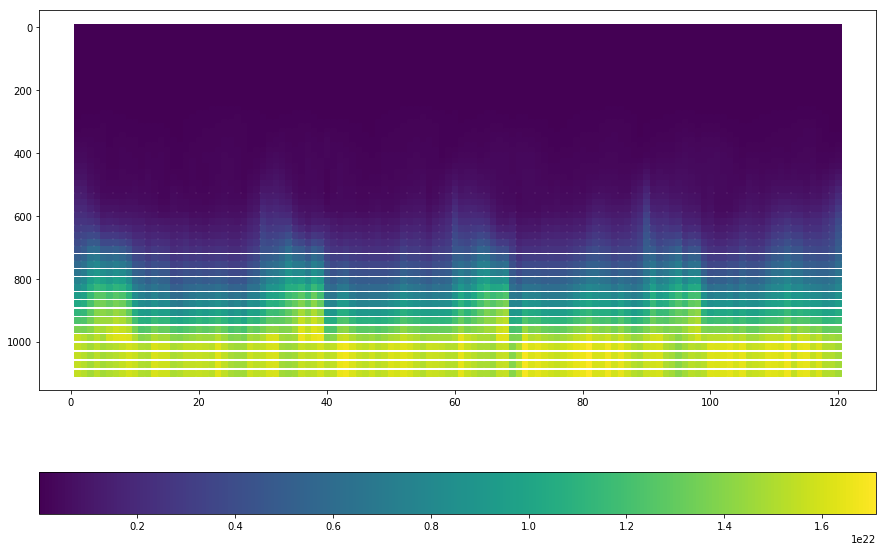

In [138]:
# Initiate the plot
fig = plt.figure(figsize=(15, 10))

# Plots the latitude and longitude of the NUCAPS data
plt.scatter(repeatFORs, nucaps['Pressure'].values, c=nucaps['H2O'].values, marker=',')

plt.colorbar(orientation='horizontal')

# Reverse the y axes
plt.gca().invert_yaxis()

# Display plot
plt.show()

Discussion

In [139]:
# Make a dictionary with pressure levels and indices ...
pressureLevs = np.array(nucaps.sel(Number_of_CrIS_FORs=0).Pressure.values, dtype='i4')

PresLevIndex = {}
for i, plev in enumerate(pressureLevs):
    PresLevIndex.update( {plev : i} )

In [121]:
PresLevIndex.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 16, 43, 18, 259, 20, 23, 26, 29, 286, 32, 802, 35, 39, 555, 300, 1070, 47, 51, 777, 56, 314, 827, 60, 575, 66, 71, 328, 1100, 77, 83, 852, 343, 89, 96, 272, 358, 103, 617, 1042, 878, 515, 958, 374, 125, 639, 133, 390, 904, 407, 142, 661, 151, 160, 931, 424, 170, 683, 180, 441, 190, 117, 706, 200, 459, 212, 729, 986, 477, 223, 535, 235, 110, 496, 753, 1013, 247, 596])

Discussion

In [148]:
griddedView = nucaps.sel(Number_of_P_Levels=PresLevIndex[496])
#griddedView

Discussion

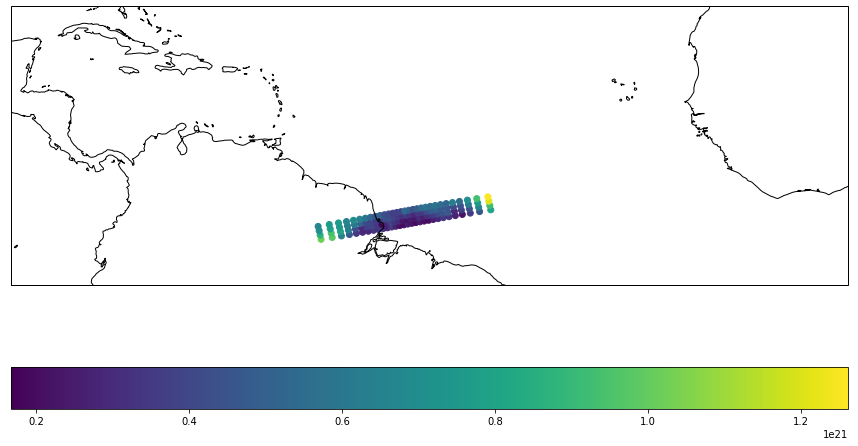

In [151]:
# Initiate the plot
fig = plt.figure(figsize=(15, 10))

# Adds a map to the plot
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

# Plots the latitude and longitude of the NUCAPS data
plt.scatter(griddedView['Longitude'], griddedView['Latitude'], c=griddedView['H2O'])

plt.colorbar(orientation='horizontal')

# Expands axes
ax.set_ylim(-5, 25)
ax.set_xlim(-90, 0)

# Display plot
plt.show()

Discussion

In [142]:
# Import all files (may take a momenbt...)
allfiles = glob("sal/NUCAPS-EDR_v2r0_npp_s*.nc")
nucapsAll = xr.open_mfdataset(allfiles, decode_times=False)

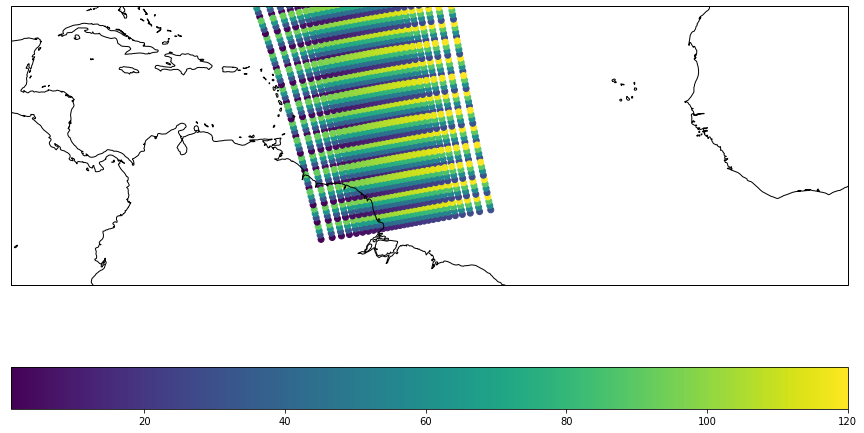

In [150]:
# Initiate the plot
fig = plt.figure(figsize=(15, 10))

# Adds a map to the plot
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

# Plots the latitude and longitude of the NUCAPS data
plt.scatter(nucapsAll['Longitude'], nucapsAll['Latitude'], c=nucapsAll['CrIS_FORs'])

plt.colorbar(orientation='horizontal')

# Expands axes
ax.set_ylim(-5, 25)
ax.set_xlim(-90, 0)

# Display plot
plt.show()

Discussion

In [144]:
# Quality flag
griddedView = nucapsAll.sel(Number_of_P_Levels=PresLevIndex[496])
griddedView = griddedView.where(griddedView['Quality_Flag'] == 0, drop=True)

Discussion

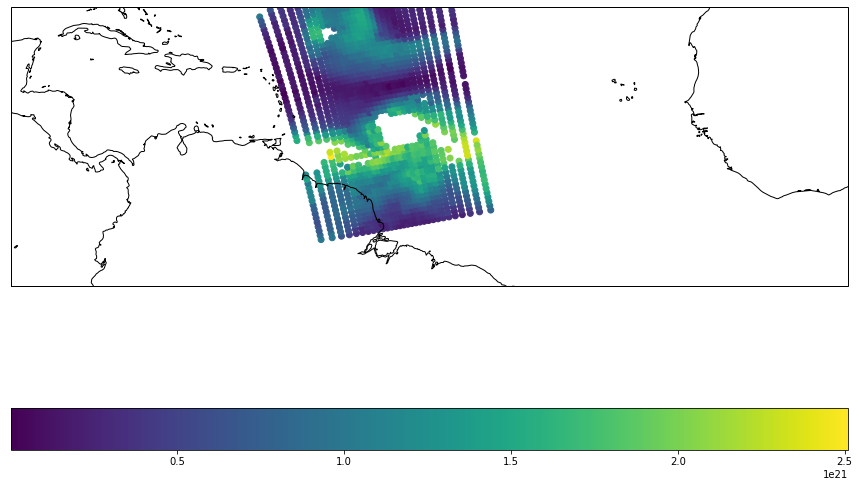

In [145]:
# Initiate the plot
fig = plt.figure(figsize=(15, 15))

# Adds a map to the plot
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

# Plots the latitude and longitude of the NUCAPS data
plt.scatter(griddedView['Longitude'], griddedView['Latitude'], c=griddedView['H2O'])

plt.colorbar(orientation='horizontal')

# Expands axes
ax.set_ylim(-5, 25)
ax.set_xlim(-90, 0)

# Display plot
plt.show()

Discussion